### Step 1. 필요한 라이브러리 임포트

In [1]:
import pandas as pd

### Step 2. [데이터](https://raw.githubusercontent.com/Datamanim/datarepo/main/bicycle/seoul_bi.csv) 확인

- 대여일자
- 대여시간
- 대여소번호
- 대여구분코드
- 성별
- 연령대코드
- 이용건수
- 운동량
- 탄소량
- 이동거리
- 사용시간

### Step 3. read_csv를 통해 데이터를 올바른 형태로 불러온 뒤 bycle에 저장해주세요.
* data : seoul_bi.csv
* encoding : cp949
* 대여일자를 datetime으로 설정해주세요.

In [3]:
bycle = pd.read_csv('../data/seoul_bi.csv', 
                    encoding='cp949', parse_dates = ['대여일자'])

In [4]:
bycle.head()

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-06-01,0,3541,정기권,F,~10대,1,0.00,0.00,0.00,8
1,2021-06-01,0,765,정기권,F,~10대,1,27.21,0.35,1526.81,19
2,2021-06-01,0,2637,정기권,F,~10대,1,41.40,0.37,1608.56,18
3,2021-06-01,0,2919,정기권,F,~10대,1,0.00,0.00,0.00,75
4,2021-06-01,0,549,정기권,F,~10대,1,13.04,0.17,731.55,6


In [5]:
bycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678950 entries, 0 to 678949
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   대여일자    678950 non-null  datetime64[ns]
 1   대여시간    678950 non-null  int64         
 2   대여소번호   678950 non-null  int64         
 3   대여구분코드  678950 non-null  object        
 4   성별      678950 non-null  object        
 5   연령대코드   678950 non-null  object        
 6   이용건수    678950 non-null  int64         
 7   운동량     678950 non-null  object        
 8   탄소량     678950 non-null  object        
 9   이동거리    678950 non-null  float64       
 10  사용시간    678950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 57.0+ MB


In [6]:
#방법1 운동량과 탄소량이 float인테 object이므로 전체 바꾸기
bycle.replace('\\N', 0, inplace=True)

In [7]:
#방법2 두 컬럼에서만 바꾸기
bycle[['운동량', '탄소량']] = bycle[['운동량', '탄소량']].replace('\\N', 0).astype(float)

### Step 4. 대여일자별 데이터의 수(size)를 데이터프레임으로 출력하고, 가장 많은 데이터가 있는 날짜순으로 정렬하세요.

In [11]:
bycle.groupby('대여일자').size().to_frame('일별 사용량').sort_values('일별 사용량', ascending=False)

,일별 사용량
대여일자,
2021-06-04,56788
2021-06-02,56100
2021-06-08,55623
2021-06-14,54945
2021-06-09,54507
2021-06-05,52730
2021-06-07,52623
2021-06-11,52089
2021-06-12,48569


### Step 5. 각 일자의 요일을 dt 접근자의 day_name() 함수를 사용하여 '요일' 컬럼에 추가하고 각 요일별 이용 횟수의 총합을 출력하세요.

In [12]:
bycle['요일'] = bycle['대여일자'].dt.day_name()
bycle.groupby('요일')['이용건수'].sum()

요일
Friday       120716
Monday       119271
Saturday     110900
Sunday        99297
Thursday      60338
Tuesday      114492
Wednesday    122653
Name: 이용건수, dtype: int64

### Step 6. 각 요일별 가장 많이 이용한 대여소번호를 찾고 사용횟수를 출력하세요.

In [ ]:
# 월 - 대여소번호 : 값
# 화 - 대여소번호 : 값
# 수 - 대여소번호 : 값
#    ===> 요일과 대여소번호 둘로 그룹

In [13]:
df1 = bycle.groupby(['요일', '대여소번호'])['이용건수'].sum()
df1

요일         대여소번호
Friday     102      167
           103      173
           104       75
           105       68
           106      178
                   ... 
Wednesday  4867      22
           4868       5
           9980       1
           9997       4
           9999       6
Name: 이용건수, Length: 16874, dtype: int64

In [14]:
df2 = bycle.groupby('요일')['대여소번호'].value_counts()
df2

요일         대여소번호
Friday     502      277
           2715     263
           1210     251
           207      238
           2102     229
                   ... 
Wednesday  4314       1
           2536       1
           2534       1
           381        1
           2288       1
Name: count, Length: 16874, dtype: int64

In [15]:
pd.concat([df1, df2], axis = 1)

이용건수  count
요일        대여소번호             
Friday    102     167    145
          103     173    143
          104      75     72
          105      68     60
          106     178    155
...               ...    ...
Wednesday 4867     22     20
          4868      5      5
          9980      1      1
          9997      4      4
          9999      6      6

[16874 rows x 2 columns]

In [16]:
# 정답
bycle.groupby('요일')['대여소번호'].value_counts().groupby('요일').head(1)

요일         대여소번호
Friday     502      277
Monday     502      242
Saturday   502      378
Sunday     502      372
Thursday   2715     137
Tuesday    502      267
Wednesday  502      282
Name: count, dtype: int64

### Step 7.  나이대별 대여구분 코드의 (일일권/전체횟수) 비율을 구한 후 가장 높은 비율을 가지는 나이대를 확인하세요. 
**일일권의 경우 '일일권' 과 '일일권(비회원)'을 모두 포함하세요.**

In [22]:
#  '일일권' 과 '일일권(비회원)'을 하나로 
bycle['대여구분코드'].replace('일일권(비회원)', '일일권', inplace=True)
bycle['대여구분코드'].unique()

array(['정기권', '일일권', '단체권'], dtype=object)

In [21]:
daily = bycle[bycle['대여구분코드'] == '일일권'].groupby('연령대코드').size()
daily

연령대코드
20대     59393
30대     31127
40대     12695
50대      4607
60대       819
70대~      158
~10대    11540
dtype: int64

In [20]:
total = bycle.groupby('연령대코드').size()
total

연령대코드
20대     247561
30대     186722
40대     114799
50대      70428
60대      19288
70대~      3227
~10대     36925
dtype: int64

In [23]:
# 비율구하기: 전체 건수(일일권)/ 연령별 건수(일일권)
(daily / total).sort_values(ascending=False)

연령대코드
~10대    0.312525
20대     0.239913
30대     0.166702
40대     0.110585
50대     0.065414
70대~    0.048962
60대     0.042462
dtype: float64

### Step8. 연령대별 평균 이동거리를 구하세요.

In [24]:
bycle.groupby('연령대코드')['이동거리'].mean()

연령대코드
20대     3211.890552
30대     3341.443859
40대     3514.857416
50대     3593.668100
60대     3538.145737
70대~    3085.039641
~10대    2634.426279
Name: 이동거리, dtype: float64

In [25]:
# 위의 평균값이 맞는 평균인지.. 0값 처리 문제  --> 0보다 큰 값들만의 평균
bycle[bycle['이동거리'] > 0].groupby('연령대코드')['이동거리'].mean()

연령대코드
20대     3404.153785
30대     3539.636348
40대     3718.433718
50대     3804.850598
60대     3745.952079
70대~    3234.380416
~10대    2802.137127
Name: 이동거리, dtype: float64

### Step 9. 연령대 코드가 20대인 데이터를 추출하고,이동거리값이 추출한 데이터의 이동거리값의 평균 이상인 데이터의 탄소량 평균을 추출하세요. 

In [25]:
# 20대, 30대 일 경우
bycle[(bycle['연령대코드'] == '20대')  | (bycle['연령대코드'] == '30대')]
bycle[bycle['연령대코드'].isin(['20대', '30대'])]

,대여일자,대여시간,대여소번호,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,요일
6,2021-06-01,0,953,정기권,F,20대,1,0.00,0.00,0.00,11,Tuesday
7,2021-06-01,0,1029,정기권,F,20대,1,37.84,0.34,1470.00,7,Tuesday
8,2021-06-01,0,1153,정기권,F,20대,1,31.17,0.35,1513.53,10,Tuesday
9,2021-06-01,0,1653,정기권,F,20대,1,8.00,0.10,430.00,3,Tuesday
10,2021-06-01,0,1716,정기권,F,20대,1,52.67,0.31,1357.20,8,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
678854,2021-06-14,23,2264,정기권,M,30대,1,7.43,0.05,208.57,2,Monday
678855,2021-06-14,23,389,정기권,M,30대,1,10.47,0.08,352.56,2,Monday
678856,2021-06-14,23,415,정기권,M,30대,1,46.56,0.31,1351.40,6,Monday
678857,2021-06-14,23,2136,정기권,M,30대,1,71.71,0.65,2786.12,17,Monday


In [24]:
# 정답
# 20대
bycle20 = bycle[bycle['연령대코드'] == '20대']
# 이동거리의 평균 보다 이동거리가 큰 애들만 모아라
bycle20_mean = bycle20['이동거리'].mean()
bycle20_over = bycle20[bycle20['이동거리'] >= bycle20_mean]
# 탄소량 평균
bycle20_over['탄소량'].mean()

1.7661332138833463

### Step 10. 평일 (월~금) 출근 시간대(오전 6,7,8시)의 대여소별 이용 횟수를 구해서 각 대여시간별 이용 횟수의 상위 3개 대여소와 이용횟수를 출력하세요.

In [26]:
# 평일(월~금), 시간(6 ~ 8)
bycleweek = bycle[bycle['요일'].isin(['Wednesday', 'Monday', 'Thursday', 'Tuesday', 'Friday'])]
bycle_wh = bycleweek[bycleweek['대여시간'].isin([6,7,8])]

In [27]:
# 대여소별 이용회수(value_counts) groupby().head(3)

bycle_wh.groupby('대여시간')['대여소번호'].value_counts().groupby('대여시간').head(3).to_frame()

count
대여시간 대여소번호       
6    2744      45
     1125      40
     3214      36
7    259      104
     230       77
     726       77
8    2701     119
     646      115
     1152      92

### Step 11. 성별(남 : 'M' or 'm' / 여 : 'F' or 'f')에 따른 사용시간별 운동량의 평균값을 계산하세요.

In [28]:
'Data'.upper(), 'Data'.lower()

('DATA', 'data')

In [30]:
bycle['성별'] = bycle['성별'].apply(lambda x : x.upper())
bycle['성별'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
box = plt.boxplot(bycle[bycle['이동거리'] <= max_]['이동거리'])
max_ = box['whiskers'][1].get_ydata()[1]

In [129]:
bycle['운/사'] = bycle['운동량'] / bycle['사용시간']

In [148]:
bycle2 = bycle[(bycle['사용시간'] > 0) & (bycle['운동량'] > 0) & (bycle['이동거리'] <= 3000)]

In [149]:
bycle2.groupby('성별')['운/사'].mean()

성별
F     2.889090
M    21.127774
Name: 운/사, dtype: float64

### Step 12. 대여구분코드를 (정기권/일일권) 두 집단으로 만든뒤(단체권은 일일권으로 한다) 대여구분코드 종류에 따라서 이용시간이 차이가 있는지 확인하세요.

In [41]:
# 그래프 크기 조절
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,2)
# 한글 폰트 적용
from matplotlib import font_manager, rc
font = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)

In [152]:
# 대여구분코드(범주형), 이용시간(수치형)
# 단변량
# value_counts()
bycle['대여구분코드'].replace('단체권', '일일권', inplace=True)
bycle['대여구분코드'].value_counts()

대여구분코드
정기권    555593
일일권    123357
Name: count, dtype: int64

<Axes: xlabel='대여구분코드', ylabel='count'>

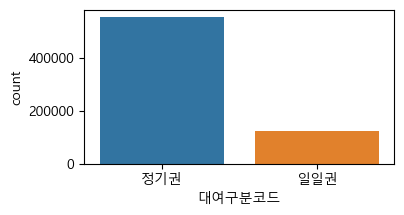

In [155]:
sns.countplot(data = bycle, x = '대여구분코드')

In [159]:
# 이용시간(수치형)
# 단변량
bycle['사용시간'].describe()

count    678950.000000
mean         28.109300
std          31.399754
min           0.000000
25%           8.000000
50%          16.000000
75%          37.000000
max        1327.000000
Name: 사용시간, dtype: float64

<Axes: xlabel='사용시간'>

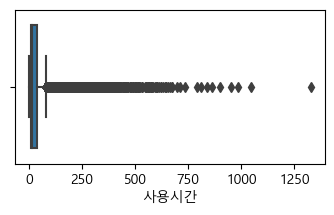

In [160]:
sns.boxplot(data = bycle, x = '사용시간')

<Axes: xlabel='사용시간', ylabel='Count'>

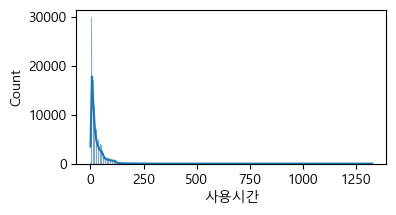

In [161]:
sns.histplot(data = bycle, x = '사용시간', kde=True)

In [33]:
# 가능한 정규분포 갖도록 데이터 조정 -이상치 제거하던지 또는 결과 생각하며 잘 선택해야
bycle2 = bycle[(bycle['사용시간'] < 750) & (bycle['사용시간'] > 0)]

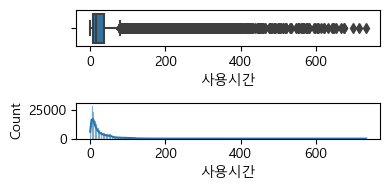

In [166]:
plt.subplot(2,1,1)
sns.boxplot(data = bycle2, x = '사용시간')
plt.subplot(2,1,2)
sns.histplot(data = bycle2, x = '사용시간', kde=True)
plt.tight_layout()

In [34]:
df1 = bycle2[bycle2['대여구분코드'] == '정기권']['사용시간']
df2 = bycle2[bycle2['대여구분코드'] == '일일권']['사용시간']

In [36]:
# 정규성, 등분산성
from scipy import stats

print(stats.anderson(df1))
print(stats.anderson(df2))
print(stats.kstest(df1, 'norm'))
print(stats.kstest(df2, 'norm'))

AndersonResult(statistic=42163.196976459585, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=25.650697596537313, scale=28.59481478963394)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
AndersonResult(statistic=6227.5407127459475, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=38.02060356219716, scale=37.36681118051337)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
KstestResult(statistic=0.9706240963204599, pvalue=0.0, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.9896324073399239, pvalue=0.0, statistic_location=3, statistic_sign=-1)


In [37]:
# 비모수 검정 - ttest_ind vs mannwhitneyu
stats.mannwhitneyu(df1, df2)

MannwhitneyuResult(statistic=24707638890.0, pvalue=0.0)

<Axes: xlabel='사용시간', ylabel='Density'>

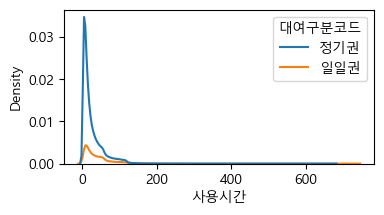

In [173]:
sns.kdeplot(data = bycle2, x = '사용시간', hue = '대여구분코드')

In [174]:
print(df1.mean(), df2.mean())

25.650697596537313 39.16003016224368


<Axes: xlabel='대여구분코드', ylabel='사용시간'>

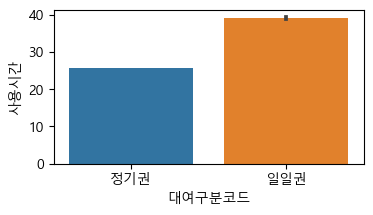

In [175]:
sns.barplot(data = bycle2, x = '대여구분코드', y='사용시간')